In [31]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [32]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/Java/docs')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs


In [33]:
df = pd.read_csv("../output/SinVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,sin,Error Deviation,Value Deviation,Uncertainty,Mean,Bias,Leak,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
0,Gaussian,0.2,-1.000000,-1.224650e-16,0.999221,0.195914,0.196066,0.000897,2.424970e-18,0.0,...,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,NaN
1,Gaussian,0.2,-0.916667,-2.588190e-01,0.998569,0.189250,0.189521,0.005981,5.124970e-03,0.0,...,0.0001,0.0002,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,NaN
2,Gaussian,0.2,-0.833333,-5.000000e-01,0.997770,0.169983,0.170363,0.010657,9.900680e-03,0.0,...,0.0005,0.0002,0.0000,0.0002,0.0000,0.0000,0.0000,0.0,0.0,NaN
3,Gaussian,0.2,-0.750000,-7.071070e-01,0.996619,0.139546,0.140019,0.014606,1.400170e-02,0.0,...,0.0011,0.0006,0.0002,0.0001,0.0000,0.0001,0.0001,0.0,0.0,NaN
4,Gaussian,0.2,-0.666667,-8.660250e-01,0.994532,0.100379,0.100930,0.017561,1.714850e-02,0.0,...,0.0016,0.0016,0.0008,0.0006,0.0005,0.0001,0.0001,0.0,0.0,NaN


In [34]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.2]

# Deviation vs Uncertainty

In [37]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sorted(df['Noise'].unique()), noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m']):
    fig, ax = plt.subplots()
    ax.set_title('sin(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

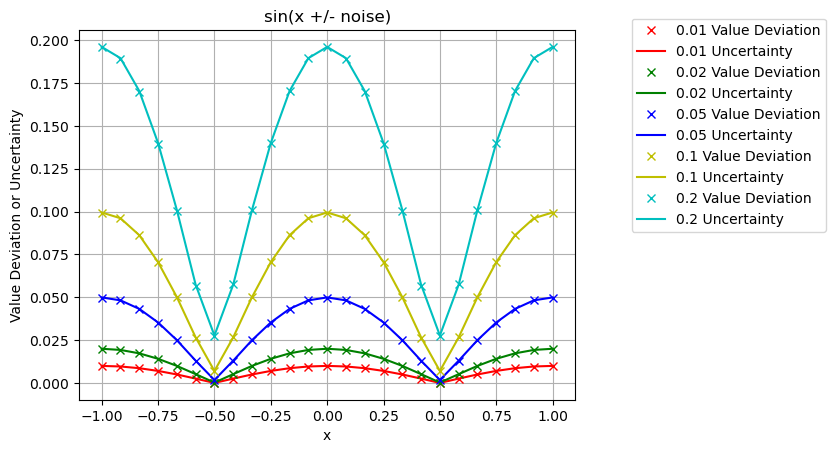

In [38]:
PlotValues()

In [49]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\sin(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel('Uncertainty or Value Deviation')
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax.legend(bbox_to_anchor=(1.57, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

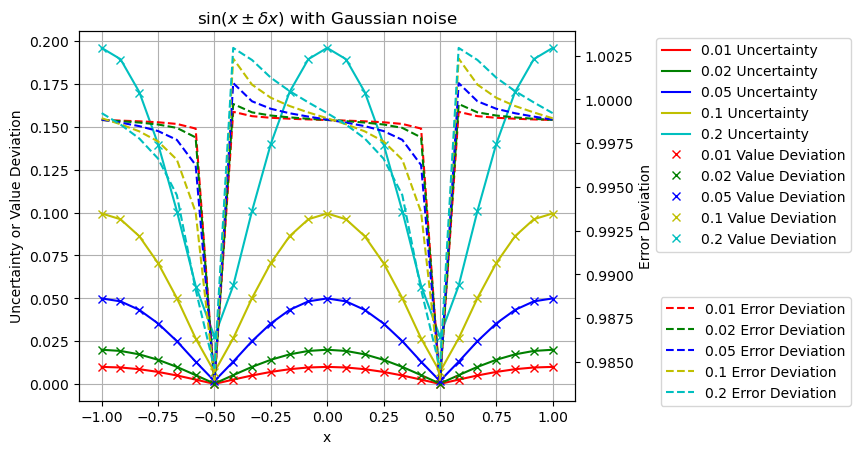

In [50]:
PlotErrorDev()

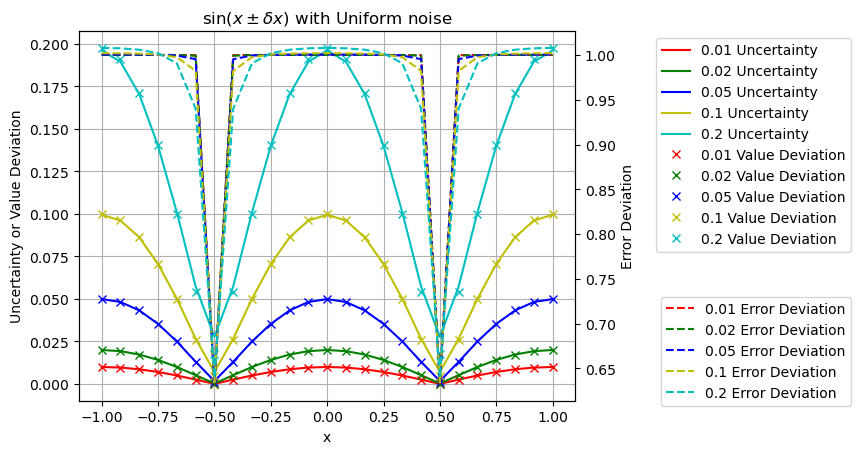

In [51]:
PlotErrorDev('Uniform')

# Mean vs Bias

In [ ]:
PlotValues(sValue=['Mean', 'Bias'])

# Histogram

In [ ]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

In [ ]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


In [ ]:
PlotHisto(sNoiseType=['Gaussian'])

In [ ]:
PlotHisto()

In [ ]:
PlotHisto(sX=[0])

In [ ]:
PlotHisto(sX=[0.25])

In [ ]:
PlotHisto(sX=[-0.25])

In [ ]:
PlotHisto(sX=[0.5])

In [ ]:
PlotHisto(sX=[-0.5])

In [ ]:
PlotHisto(sX=[0.75])

In [ ]:
PlotHisto(sX=[-0.75])

In [ ]:
PlotHisto(sX=[+1])

In [ ]:
PlotHisto(sX=[-1])